In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/creditcard.csv')

# **DL CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
# Preprocess the data
scaler = StandardScaler()
data['normalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Class'], axis=1), data['Class'], test_size=0.2, random_state=42)

In [ ]:
# Reshape the data for CNN input
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(29, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1781/1781 [==============================] - 119s 64ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 2/20
1781/1781 [==============================] - 111s 62ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/20
1781/1781 [==============================] - 109s 61ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 4/20
1781/1781 [==============================] - 109s 61ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/20
1781/1781 [==============================] - 112s 63ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 6/20
1781/1781 [==============================] - 109s 61ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/20
1781/1781 [==============================] - 110s 62ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0032724759075790644
Test accuracy: 0.9994557499885559


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test, y_pred)}\n")

1781/1781 [==============================] - 13s 7ms/step
Confusion matrix:
[[56854    10]
 [   21    77]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.79      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962




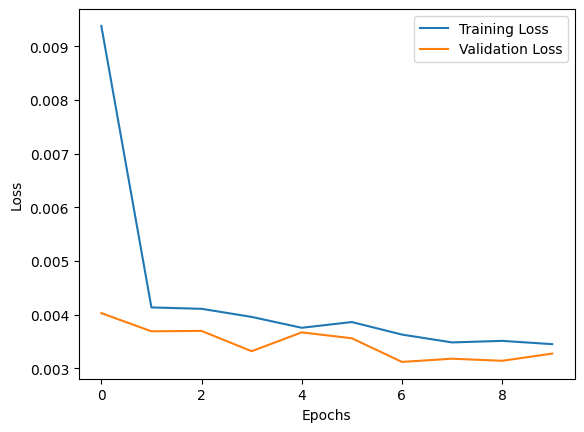

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss vs. epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


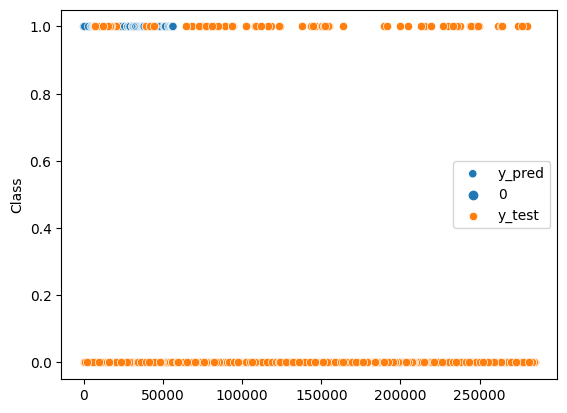

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the training and validation loss vs. epochs
sns.scatterplot(y_pred, label='y_pred')
sns.scatterplot(y_test, label='y_test')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Split the data into features and target
X = data.drop(['Class'], axis=1).values
y = data['Class'].values

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(29, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define the number of splits for Stratified K-Fold cross-validation
n_splits = 5

# Perform Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f'Fold {i+1}/{n_splits}')

    # Split the data into train and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Reshape the data for CNN input
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[early_stopping])

    # Evaluate the model on the current fold
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Fold {i+1} Test loss:', score[0])
    print(f'Fold {i+1} Test accuracy:', score[1])


Fold 1/5
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1781/1781 [==============================] - 121s 65ms/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 2/20
1781/1781 [==============================] - 115s 65ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0063 - val_accuracy: 0.9986
Epoch 3/20
1781/1781 [==============================] - 115s 64ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 4/20
1781/1781 [==============================] - 115s 64ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 5/20
1781/1781 [==============================] - 114s 64ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 6/20
1781/1781 [==============================] - 115s 65ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 7/20
1781/1781 [==============================] - 116s 65ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0038 - val